In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

(
u
0
(t) = u(t)

α − βv(t)

,
v
0
(t) = v(t)

−γ + δu(t)



In [42]:
def run_tir(u0, v0):
    """
    calcul un tir avec un angle theta
    et retourne le point d'impact et toute la suite des positions
    Le schéma numérique de résolution de l'EDO
    est la méthode d'Euler explicite
    
    Parameters
    ----------
    
    theta: double
        l'angle d'incidence du tir
    
    dt: double
        pas de temps de la méthode
        
    Returns
    -------
    
    px: double
        position de l'impact
        
    posx, posy: ndarray, ndarray
        suite des positions
    """
    alpha = 2/3
    beta = 4/3
    gamma, sigma  = 1,1
    
    u = u0
    v = v0
    
    res_u =[]
    res_v =[]
    
    for i in np.arange(0,40+0.01,0.01):
        u_prev = u
        u += 0.01*u*(alpha - beta * v)
        v += 0.01*v*(-gamma + sigma*u_prev)
        res_u.append(u)
        res_v.append(v)
        
    return res_u,res_v

In [43]:
a,b = run_tir(1,1)


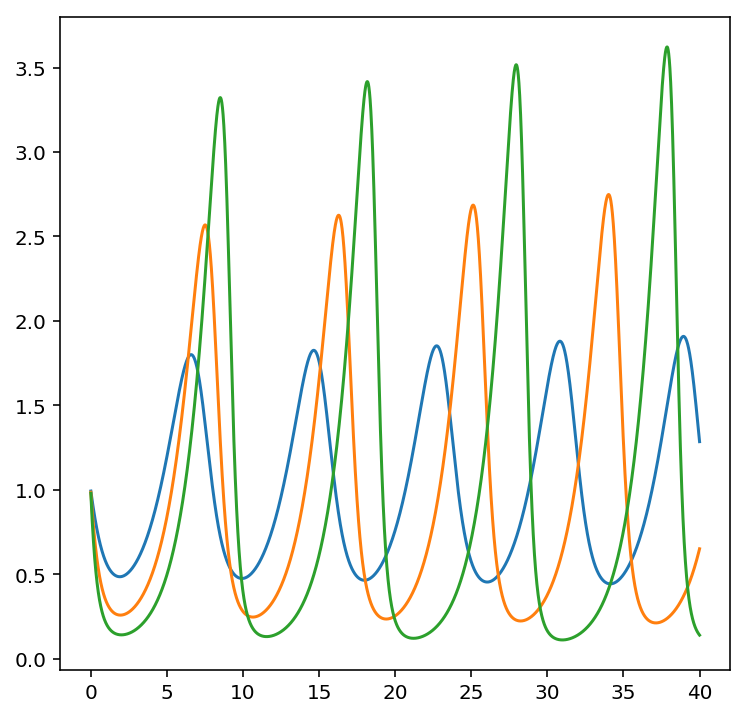

In [44]:
d = 500

vtheta = np.linspace(0, np.pi/2, 1025)
vtheta = vtheta[1:-1]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

Tf = 40
dt = 0.01

for v0 in [1,1.5,2]:
    a,b=run_tir(1,v0)


    t = np.arange(0,Tf+dt, dt)
    #print(len(t),len(a))
    ax.plot(t, a)
    
#ax.plot(t, b)
#ax.plot(a, b)



In [3]:
def run_tir(theta, dt):
    """
    calcul un tir avec un angle theta
    et retourne le point d'impact et toute la suite des positions
    Le schéma numérique de résolution de l'EDO
    est la méthode d'Euler explicite
    
    Parameters
    ----------
    
    theta: double
        l'angle d'incidence du tir
    
    dt: double
        pas de temps de la méthode
        
    Returns
    -------
    
    px: double
        position de l'impact
        
    posx, posy: ndarray, ndarray
        suite des positions
    """
    
    
    
    dtx = 0
    vx = v0*np.cos(theta)
    
    dty = 0
    vy = v0*np.sin(theta)
    
    posx, posy = [dtx], [dty]

    while dty>=0:
        
        dtx += dt*vx
        dty += dt*vy
        
        vx -= dt*nu*vx
        vy -= dt*(g +nu*vy)
        
        posx.append(dtx)
        posy.append(dty)
    
    return dtx, (posx, posy)